#### 前言：
在第1章中，我们提到最常见的监督学习任务是**回归**（预测值）和**分类（**预测类）。 在第2章中我们探索了回归任务，使用各种算法，如线性回归，决策树和随机森林（将在后面的章节中进一步详细说明）。 现在我们将注意力转向**分类**系统。

#### MNIST
在本章中，我们将使用MNIST数据集，这是由高中学生和美国人口普查局的雇员手写的一组70,000个小数字图像。每个图像都标有它所代表的数字。 这个集已经被研究了很多次，它通常被称为机器学习的“Hello World”：每当人们想出一个新的分类算法时，他们都很想知道它将如何在MNIST上表现。 每当有人学习机器学习时，他们迟早会解决MNIST问题。



## 0.Setup
First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [1]:
# To support both python 2 and python 3
# 让这份笔记同步支持 python 2 和 python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
# 让笔记全程输入稳定
np.random.seed(42)

# To plot pretty figures
# 导入绘图工具
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
# 设定图片保存路径，这里写了一个函数，后面直接调用即可
PROJECT_ROOT_DIR = "F:\ML\Machine learning\Hands-on machine learning with scikit-learn and tensorflow"
CHAPTER_ID = "Classification_MNIST_03"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
# 忽略无用警告
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## 1. MNIST
Scikit-Learn提供了许多辅助函数来下载流行的数据集。 MNIST是其中之一。 以下代码获取MNIST数据集：

In [2]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')
mnist

C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

使用Scikit-Learn下载的数据集通常有一个类似于字典的结构：
* 一个'**DESCR**'关键字用来描述数据集
* 一个'**data**'关键字包含一个数组，这个数组的每一行代表一个例子，每一列代表一个特征
* 一个'**target**'关键字，包含一个数组，数组内容是例子的标签 

In [3]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

X是数据集，是一个形状为 70000 x 784 的数组：70000行，784 列。 每一行代表了一个例子，有70000张图片，即70000个例子，每个例子有784个特征，这是因为每张图片有 28 x 28 个像素，每个特征代表了每个像素的强度，像素强度范围是[0,255] 下面的代码是查看其中一张图片，我们需要将它重新转化为28 x 28 的图片

In [4]:
y.shape

(70000,)

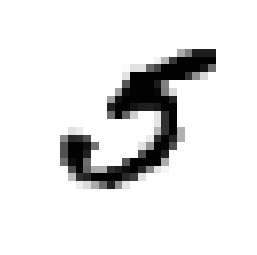

In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
interpolation="nearest")

plt.axis("off")
plt.show()

In [6]:
y[36000]

5.0

In [7]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [8]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

Saving figure more_digits_plot


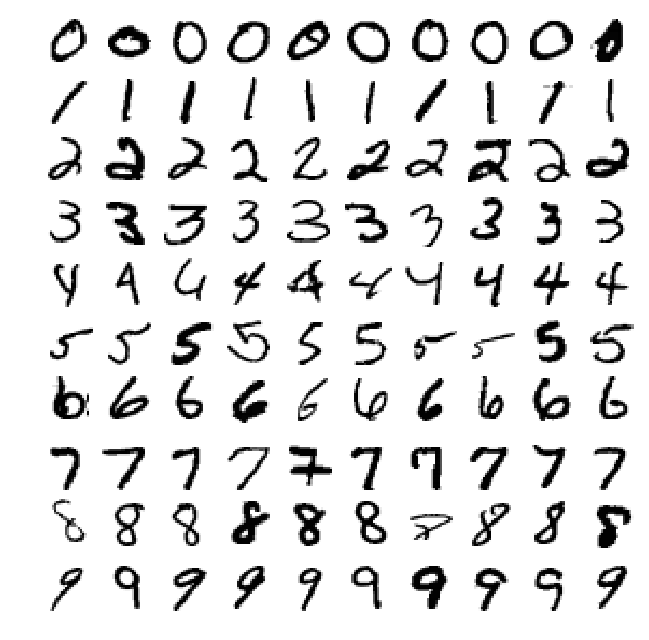

In [9]:
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

You should always create a test set and set it aside before inspecting the data closely. The MNIST dataset is actually already split into a training set (the first 60,000images) and a test set (the last 10,000 images):

In [10]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [11]:
# Shuffle the training set; this will guarantee that all cross-validation folds will be similar 
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## 2. Training a Binary Classifier

下面建立一个二分类器，识别是5 或者不是5，我们选择的分类器是**SGD**，即Stochastic Gradient Descent。SGD的优势是能够有效的处理大型数据，原因之一是 SGD在每一时刻只处理一个训练例子，这也导致它适合于 **online learning**

In [12]:
y_train_5 = (y_train == 5)# True for all 5s, False for all other digits.
y_test_5 = (y_test == 5)

In [13]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [14]:
# 用刚才得到的5进行验证
sgd_clf.predict([some_digit])

array([ True])

## 3. Performance Measures
Evaluating a classifier is often significantly trickier than evaluating a regressor

### 3.1 Measuring Accuracy Using Cross-Validation

使用交叉验证集评估模型是一个不错的选择

In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9502 , 0.96565, 0.96495])

#### Implementing Cross-Validation

In [16]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9502
0.96565
0.96495


超过95%的准确率，这看起来的确不错，但是现在高兴为时过早，让我们看一个非常愚蠢的分类器，它只是对“not-5”类中的每个图像进行分类：

In [17]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [18]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.909  , 0.90715, 0.9128 ])

超过90%的准确率，好像也很高。之所以出现这样的情况是因为在MNIST数据集中，数字5 占了10%左右，如果我们一直猜测不是数字5的概率，那么我们的准确率几乎会一直高于90%。

这个现象证明了对于**classifiers**为什么**准确率**通常不是首选的性能指标，尤其是在处理偏斜数据集时（即，当某些类比其他类更频繁时）。

### 3.2 Confusion Matrix-混淆矩阵

评估**classifiers**性能一个比较好的方法是查看混淆矩阵。 一般的想法是计算A类实例被分类为B类的次数。例如，要知道分类器将5与3混淆的次数，您将查看混淆矩阵的第5行和第3列 

要计算混淆矩阵，首先需要有一组预测，以便他们可以与实际目标进行比较。 您可以对测试集进行预测，但现在让它保持不变（请记住，只有在项目的最后才能使用测试集，一旦有了准备启动的分类器）。 相反，您可以使用**cross_val_predict（）**函数：

In [19]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

就像**cross_val_score（）**函数一样，**cross_val_predict（）**执行K-fold交叉验证，但不是返回评估分数，它返回每个test fold 上的预测。 这意味着您可以获得训练集中每个实例的clean 预测（“clean ”意味着预测是由在训练期间从未看过数据的模型进行的）。

现在我们可以通过**confusion_matrix()** 来获得混淆矩阵了，只要把目标类 ( y_train_5 ) and 预测类( y_train_pred )作为参数传递给它就可以:

In [20]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53272,  1307],
       [ 1077,  4344]], dtype=int64)


                      
negative class  [[ **true negatives** , **false positives** ],
 
positive class  [ **false negatives** , **true positives** ]]

第一行考虑**非5**的图片，**negative class** ：

* true negatives:  53,272 张被正确的分类为非5
* false positives：1307张被错误的分类为5

第一行考虑**是5**的图片，**positive class** ：

* false negatives：1077张错误的分类为非5
* true positives： 4344张被正确的分类为5

一个完美的分类器应该只有**true positives** 和 **true negatives**, 即主对角线元素不为0，其余元素为0

In [21]:
y_train_perfect_predictions = y_train_5

In [22]:
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

### Precision and Recall


**$ precision = \frac {TP} {TP + FP} $**


**$ recall = \frac {TP} {TP + FN} $**


* TP is the number of true positives
* FP is the number of false positives
* FN is of course the number of false negatives.

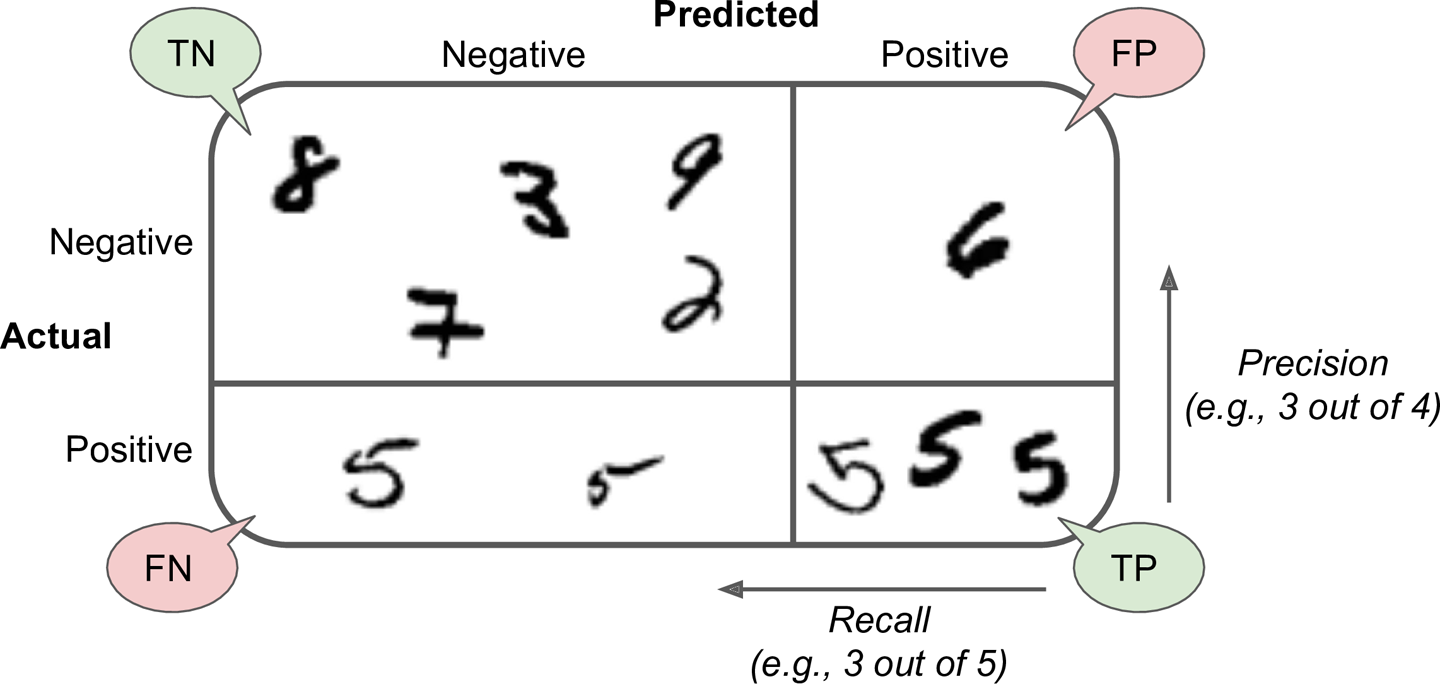

In [23]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.7687135020350381

In [24]:
recall_score(y_train_5, y_train_pred)

0.801328168234643

将**Precision** 和 **Recall**结合到一个称为**F1 score** 的量,，特别是在我们需要一种简单的方法来比较两个分类器。**F1 score**是精度和召回的调和平均值。常规均值平等地处理所有值，但调和平均值给予低值更多权重。 因此，如果召回和精确度都很高，分类器将只获得高F 1分数。

$ F_1  = $ $2\over {1\over precision}+{1\over recall} $ $=$ $2×$ $precision×recall\over precision+recall $ $=$ $TP\over {TP}+{FN + FP\over 2}$


In [25]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7846820809248555

$F_1$评分倾向于具有相似精度和召回率的分类器。这并不总是你想要的：在某些情况下，你最关心的是精确度，而在其他情况下，你真的很关心召回。例如：
* 如果您训练分类器来检测对孩子来说安全的视频，您可能更喜欢拒绝许多好视频的分类器（低召回率）但只保留安全分类（高精度），而不是一个具有更高召回率的分类器，这会让一些非常糟糕的视频出现在您的产品中（在这种情况下，您甚至可能希望添加人工管道来检查分类器的视频选择）。

* 另一方面，假设你训练一个分类器来检测监控图像上的商店扒手：如果你的分类器只有30％的精度，只要它有99％的召回率就可能很好（当然，保安人员会得到一些虚假警报，但几乎所有商店扒手都会被抓住）。

不幸的是，你无法双管齐下：提高精确度，减少召回率，反之亦然。这称为精确/召回权衡。

### 3.3 Precision/Recall Tradeoff

为了理解这种权衡，让我们看一下**SGDClassifier**是如何做出它的分类决定的。对于每个实例，它根据决策函数计算得分，如果该得分大于阈值，则将实例分配给**positive class**，否则将其分配给**negative class**。

下图显示了一些数字，从左侧最低分到右侧最高分。假设决策阈值位于中心箭头（两个5s之间）：您将在该阈值的右侧找到4个**true positives**（实际5s），和一个**false positive**（实际为6）。因此，使用该阈值，**精度**为80％（5个中的4个）。但是在6个实际数字5中，分类器仅检测到4个，因此**召回率**为67％（6个中有4个）。

现在，如果你提高阈值（将其移动到右边的箭头），**false positive**（6）变为**true negative**，从而提高**精度**（在这种情况下高达100％），但一个**true positive** 变为**false negative**，将**召回率**降低至50％。相反，降低阈值会**增加召回率**并**降低精度**。

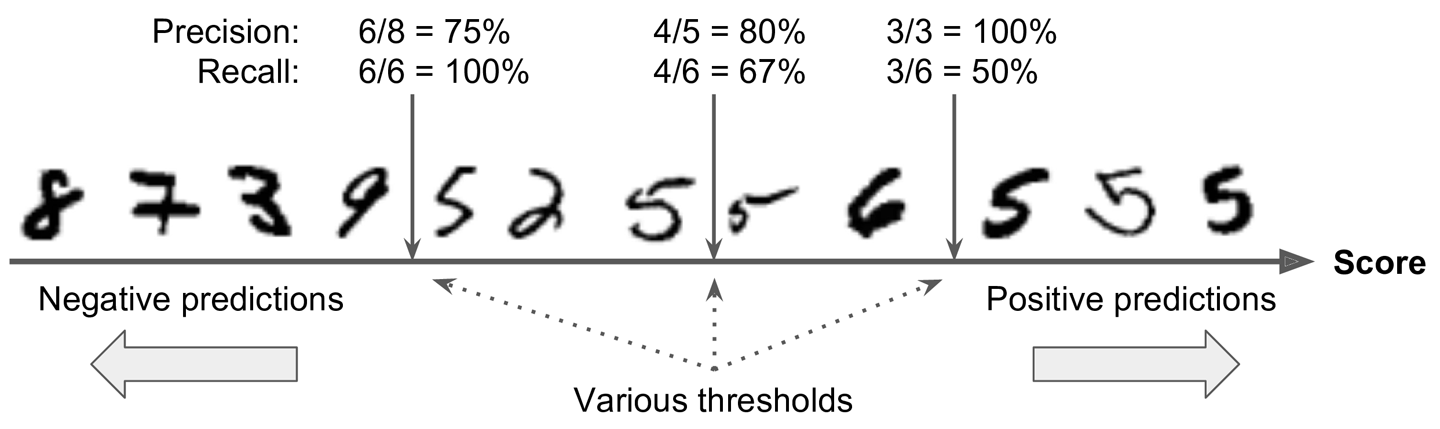

Scikit-Learn不允许您直接设置阈值，但它确实可以让您访问用于进行预测的决策分数。 您可以调用其**decision_function（）**方法，而不是调用分类器的**predict（）**方法，该方法返回每个实例的分数，然后使用您想要的**任何阈值**根据这些分数进行预测：

In [26]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([161855.74572176])

In [27]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

y_some_digit_pred

array([ True])

In [28]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)

y_some_digit_pred

array([False])

那么如何决定使用哪个阈值？ 为此，您首先需要再次使用**cross_val_predict（)** 函数获得训练集中所有实例的分数，但这一次你希望它返回决策分数而不是预测：

In [29]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

y_scores.shape

(60000,)

现在有了这些分数，您可以使用**precision_recall_curve（）** 函数计算所有可能的精度和召回率的阈值：

In [30]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

最后，您可以使用Matplotlib绘制**精度**和**召回率**作为阈值的函数：

Saving figure precision_recall_vs_threshold_plot


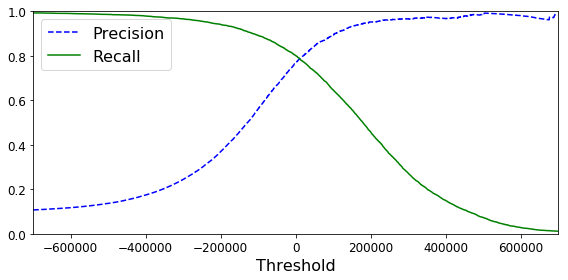

In [31]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,
             precisions[:-1],
            "b--",
            label="Precision")
    
    plt.plot(thresholds,
             recalls[:-1],
            "g-",
            label="Recall")
    plt.xlabel("Threshold",fontsize=16)
    plt.legend(loc="upper left",fontsize=16)
    plt.ylim([0,1])
    
plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.xlim([-700000, 700000])
save_fig("precision_recall_vs_threshold_plot")
plt.show()

In [32]:
(y_train_pred == (y_scores > 0)).all()

True

现在您可以选择为您的任务提供了最佳的精确度/召回权衡的阈值。 选择良好的精度/召回权衡的另一种方法是直接绘制精确度以进行召回，如图3-5所示。

Saving figure precision_vs_recall_plot


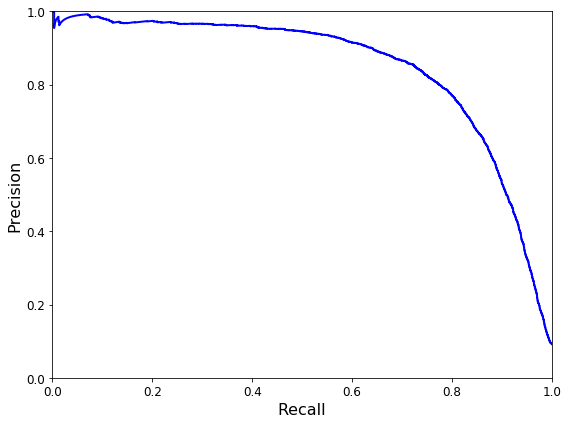

In [33]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, 
             precisions, 
             "b-", 
             linewidth=2)
    
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
save_fig("precision_vs_recall_plot")
plt.show()

你可以看到，在召回率为80%时，精度确实开始急剧下降。您可能希望在该下降之前选择精度/召回权衡 - 例如，召回率约为60％。 但当然，选择取决于您的项目。

所以我们假设你决定瞄准90％的精度。 查看上一个图发现你需要使用大约70,000的阈值。 为了做预测（现在是在训练集上），如果不调用分类器的predict（）
方法，你可以运行这段代码：

In [34]:
y_train_pred_90 = (y_scores > 70000)

让我们检查这些预测的精确度和召回率：

In [35]:
precision_score(y_train_5, y_train_pred_90)

0.8659205116491548

In [36]:
recall_score(y_train_5,y_train_pred_90)

0.6993174691016417

太棒了，你有一个精度为90％的分类器（或足够接近）！正如您所看到的，创建一个几乎任何您想要的精度的分类器相当容易：只需设置足够高的阈值，就可以了。 嗯，没那么快。 如果召回率太低，高精度分类器就不是很有用了！

### 3.4 ROC curves
**receiver operating characteristic (ROC)** 曲线是二元分类器的另一种常用工具。
* 它与精确度/召回曲线非常相似，但ROC曲线不是绘制精确度与召回率，而是绘制**true positive rate(TPR)** （召回的另一个名称）与**false positive rate(FPR)** 
* FPR是负面例子被错误归类为正面例子的比例。它等于**1 - true negative rate（TNR）**，即负面例子被正确归类为负面例子的比例。
* TNR也称为**specificity**。 

因此，ROC曲线绘制了**sensitivity**（召回）与 **1 – specificity** 。

要绘制ROC曲线，首先需要使用**roc_curve（）**函数计算各种阈值的**TPR和FPR**：

In [37]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

Saving figure roc_curve_plot


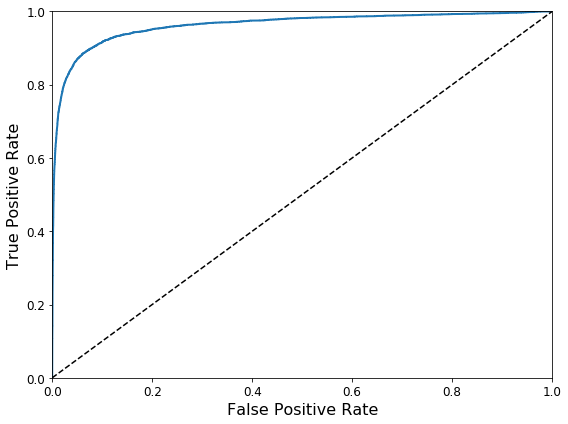

In [38]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
save_fig("roc_curve_plot")
plt.show()

这里也有一个权衡：召回（TPR）越高，分类器产生的误报（FPR）越多。 **虚线表示纯随机分类器的ROC曲线**; 一个好的分类器尽可能远离该线（朝左上角）。

比较分类器的一种方法是测量曲线下面积（AUC）。完美分类器的ROC AUC**等于1**，而纯随机分类器的ROC AUC**等于0.5**。 Scikit-Learn提供了计算ROC AUC的函数：

In [39]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9624496555967156

根据经验，每当**positiveclass** 很少或者你**更关心false positives**而不是**false negatives**时，我们更倾向于使用PR曲线，否则使用ROC曲线。

下面我们训练一个**RandomForestClassifier**并将它的ROC曲线和ROC AUC得分与**SGDClassifier**：

* 首先，我们需要获得训练集中每个实例的分数。 
* 但由于它的工作方式（见第7章），RandomForestClassi fier类没有decision_function（）方法。 
* 相反，它有一个**predict_proba（）**方法。 Scikit-Learn分类器通常有一个或另一个。
* **predict_proba（）**方法返回一个数组，这个数组的每一行包含一个实例，每一列代表一个类，每列包含给定实例属于给定类的概率（例如，图像内容表示5的概率为70％）：

In [40]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


但要绘制ROC曲线，我们需要的是得分，而不是概率。 一个简单的解决方案是使用正类的概率作为分数

In [41]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

Saving figure roc_curve_comparison_plot


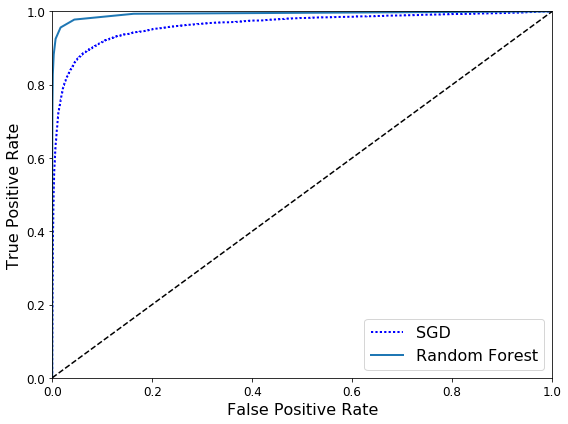

In [42]:
# It is useful to plot the first ROC curve as well to see how they compare
plt.figure(figsize=(8, 6))

plt.plot(fpr, 
         tpr, 
         "b:", 
         linewidth=2, label="SGD")

plot_roc_curve(fpr_forest, 
               tpr_forest, 
               "Random Forest")

plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

In [43]:
roc_auc_score(y_train_5, y_scores_forest)

0.9931243366003829

 从图中可以看到  **RandomForestClassifier** 的 ROC 曲线要比**SGDClassifier** 的看起来好多了: **it comes much closer to the top-left corner**.所以它的 ROC AUC score 明显的好很多

计算**precision and recall scores**

In [44]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9852973447443494

In [45]:
recall_score(y_train_5, y_train_pred_forest)

0.8282604685482383

到现在我们已经知道如何训练二元分类器：
* 为您的任务选择适当的指标，
* 使用交叉验证评估您的分类器，
* 选择适合您需求的精确/召回权衡，
* 使用ROC曲线和ROC AUC分数比较各种模型。

**以上我们尝试检测的仅仅是5s，这属于二分类，结果只有两个：是或者不是。现在我们来解决多分类的问题**

## 4.  Multiclass Classification-多类分类

一些算法（例如随机森林分类器或朴素贝叶斯分类器）是能够直接处理多个类。其他算法（例如支持向量机分类器或线性分类器）则是严格的二元分类器。但是，您可以使用各种策略来使用多个二元分类器执行多类分类。

例如：
* 一种方法是创建一个通过训练10个二元分类器，进而可以将数字图像分类为10个类（从0到9）的系统，每个数字对应一个分类器（0检测器，1检测器，2检测器等等）。然后，当您想要对图像进行分类时，您将从该图像的每个分类器中获得决策分数，并选择其分类器输出分数最高的类。这被称为**one-versus-all (OvA)**策略（也称为**one-versus-the-rest**）。
* 另一种方法是为**每对数字**训练一个二元分类器：一个用于区分0和1，另一个用于区分0和2，另一个用于区分1和2，依此类推。这称为**one-versus-one (OvO)** 策略。如果有N个类别，则需要训练**N×（N - 1）/ 2** 个分类器。对于MNIST问题，这意味着训练45个二元分类器！当您想要对图像进行分类时，您必须通过所有45个分类器运行图像，并查看哪个类赢得了最多的决斗。 OvO的**主要优点**是每个分类器只需要训练必须区分的两个类的训练集。



Some algorithms (such as Support Vector Machine classifiers) scale poorly with the size of the training set,因此对于这些算法，OvO是优选的，**因为在小训练集上训练许多分类器比在大训练集上训练少量分类器更快**。然而，对于大多数二元分类算法，OvA是优选的。当您尝试将二元分类算法用于多类分类任务时，Scikit-Learn检测到，并自动运行OvA（除了使用OvO的SVM分类器）。 让我们用SGDClassifier尝试一下：

In [46]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([5.])

上面两行代码使用0到9（y_train）的原始目标类训练训练集上的SGDClassifier，而不是**5-versus-all**目标类（y_train_5）。然后它进行预测（在这种情况下是正确的）。在幕后，Scikit-Learn实际上训练了10个二元分类器，得到了他们对图像的决策分数，并选择了得分最高的类。

要确定情况确实如此，您可以调用decision_function（）方法。它现在返回**10个分数**，每个类别一个，而不是每个实例仅返回一个分数：

In [47]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-311402.62954431, -363517.28355739, -446449.5306454 ,
        -183226.61023518, -414337.15339485,  161855.74572176,
        -452576.39616343, -471957.14962573, -518542.33997148,
        -536774.63961222]])

最高分确实是对应于第5类的分数：

In [48]:
np.argmax(some_digit_scores)

5

In [49]:
sgd_clf.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [50]:
sgd_clf.classes_[5]

5.0

如果您想强制让ScikitLearn使用一对一或一对一，您可以使用**OneVsOneClassifier**或**OneVsRestClassifier**类。只需创建一个实例并将二元分类器传递给它的构造函数。例如，下面的代码基于SGDClassifier使用OvO策略创建多类分类器：

In [51]:
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([5.])

In [52]:
len(ovo_clf.estimators_)

45

训练一个 RandomForestClassifier也很简单

In [53]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

C:\Users\baideqian\AppData\Roaming\Python\Python35\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([5.])

这次Scikit-Learn没有运行OvA或OvO，因为**随机森林分类器可以直接将实例分类为多个类**。我们可以调用**predict_proba（）**来获取分类器为每个类分配给每个实例的概率列表：

In [54]:
forest_clf.predict_proba([some_digit])

array([[0.1, 0. , 0. , 0.1, 0. , 0.8, 0. , 0. , 0. , 0. ]])

您可以看到分类器对其预测非常有信心：数组中第5个索引处的0.8意味着模型估计图像表示为5的概率为80％。它还认为图像可以是0或3（每个10％的概率）。

现在我们可以使用交叉验证来评估模型了， 我们可以使用**cross_val_score()** 评估 SGDClassifier ’s 的准确率：

In [55]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.84063187, 0.84899245, 0.86652998])

准确率超过80%，如果只是使用一个随机分类器，准确率只有10%，所以这不是一个很差的结果，但是我们可以做的更好，比如，对输入进行简单的缩放，可以将上面的准确率提高到90%：

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.91011798, 0.90874544, 0.906636  ])

## 5. Error Analysis-误差分析

如果这是一个真实的项目，你将按照你的机器学习项目清单中的步骤：

* 探索数据准备选项，
* 尝试多个模型，
* 筛选最好的模型
* 使用**GridSearchCV**微调他们的超参数，

正如我们在上一章中所做的那样，尽可能地自动化。在这里，我们假设您已找到一个有前途的模型，并且您想找到改进它的方法。 一种方法是分析它所犯的错误类型：

* 首先，您可以查看混淆矩阵。您需要使用**cross_val_predict（）**函数进行预测，
* 然后调用**confusion_matrix（）**函数，就像你之前做的那样：

In [57]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5725,    3,   24,    9,   10,   49,   50,   10,   39,    4],
       [   2, 6493,   43,   25,    7,   40,    5,   10,  109,    8],
       [  51,   41, 5321,  104,   89,   26,   87,   60,  166,   13],
       [  47,   46,  141, 5342,    1,  231,   40,   50,  141,   92],
       [  19,   29,   41,   10, 5366,    9,   56,   37,   86,  189],
       [  73,   45,   36,  193,   64, 4582,  111,   30,  193,   94],
       [  29,   34,   44,    2,   42,   85, 5627,   10,   45,    0],
       [  25,   24,   74,   32,   54,   12,    6, 5787,   15,  236],
       [  52,  161,   73,  156,   10,  163,   61,   25, 5027,  123],
       [  43,   35,   26,   92,  178,   28,    2,  223,   82, 5240]],
      dtype=int64)

使用Matplotlib的**matshow（）**函数来查看表示混淆矩阵的图像通常更方便：

In [58]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

Saving figure confusion_matrix_plot


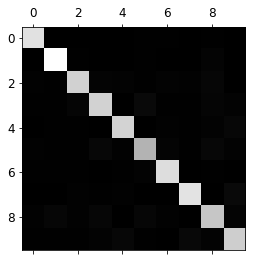

In [59]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

这个混淆矩阵看起来相当不错，因为大多数图像都在主对角线上，这意味着他们被正确分类。5s看起来比其他数字稍暗，这可能意味着数据集中5s的图像较少，或者分类器在5s上的表现不如其他数字。 实际上，您可以验证两者都是如此。

让我们把重点放在错误上：
* 首先，您需要将混淆矩阵中的每个值除以相应类中的图像数量，这样您就可以比较错误率而不是绝对错误数（这会使丰富的类看起来不那么坏）：

In [60]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

用**0**填充对角线以仅保留错误，并绘制结果;

Saving figure confusion_matrix_errors_plot


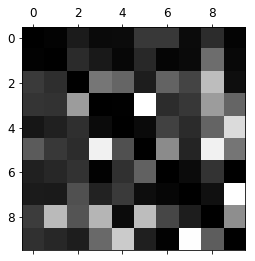

In [61]:
# 用0填充对角线以仅保留错误
np.fill_diagonal(norm_conf_mx, 0)

plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

现在我们可以清楚地看到分类器产生的错误类型。需要记住的是，**行表示实际的类**，而**列表示预测的类**：
* 类8和9所在的**列**非常明亮，它告诉您许多图像被错误分类为8或9。
* 类似地，类8和9所在的**行**也非常明亮，告诉你8s和9s经常与其他数字混淆。

相反，有些**行**非常暗：
* 例如第1行：这意味着大多数1都被正确分类（少数与8s混淆，但这就是它）。

请注意，错误并不完全对称：
* 例如，有更多的5被错误分类为8s而不是更多的8 被分类为5。

分析混淆矩阵通常可以为您改进分类方法提供见解。根据这个图，我们的注意力似乎应该花在改进上分类8s和9s上，以及修复特定的3/5混乱的情况：
* 例如，您可以尝试为这些数字收集更多训练数据
* 或者您可以设计有助于分类器的新特征 - 例如，编写算法来计算闭环的数量（例如，8有两个，6有一个，5没有）。
* 或者您可以预处理图像（例如，使用Scikit-Image，Pillow或OpenCV）使某些图案更突出，例如闭环。

**分析个别错误**也可以是一个很好的方式来获得你的分类器正在做什么以及它失败的原因的见解，但它**更困难和耗时**。例如，让我们以绘制3s和5s为例：

Saving figure error_analysis_digits_plot


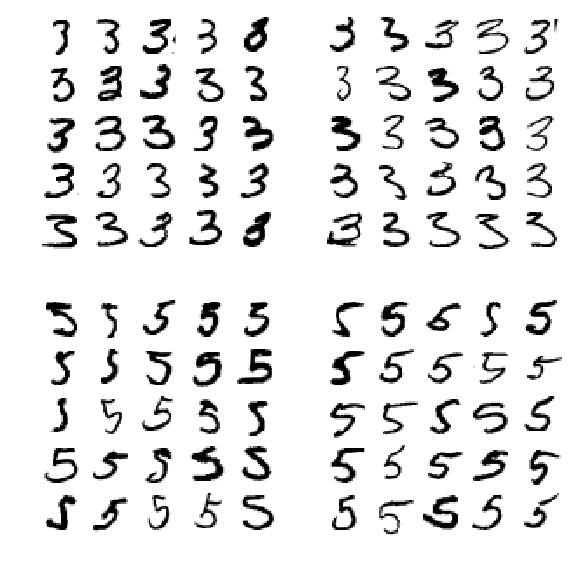

In [62]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
save_fig("error_analysis_digits_plot")
plt.show()

左侧的两个5×5块显示分类为3的数字，右侧两个5×5块显示图像分类为5s。分类器出错的一些数字（即，在左下方和右上方的区域中）写得非常糟糕，甚至是人类将它们分类都有困难（例如，第8行和第1列的5真正看起来像3）。

然而，大多数错误分类的图像对我们来说似乎是明显的错误，并且很难理解分类器为什么会犯错误。**原因**是我们使用了一个简单的SGDClassifier，它是一个线性模型。它所做的只是为每个像素分配每个类别的权重，当它看到一个新图像时，它**只是将加权像素强度相加得到每个类别的分数**。因此，**由于3s和5s仅相差几个像素**，因此该模型很容易混淆它们。

3s和5s之间的主要区别在于连接的小线的位置顶部到底部弧线。如果你绘制一个3，结点稍微偏向左边，分类器可能将其分类为5，反之亦然。换句话说，这个分类器是对图像位移和旋转非常敏感。所以减少3/5混乱的一种方法将是预处理图像，以确保它们很好地居中，而不是旋转。这可能有助于减少其他错误。

## 6.  Multilabel classification-多标签分类

到目前为止，每个实例始终只分配给一个类。 在某些情况下，您可能希望分类器为每个实例输出多个类。例如，考虑一个人脸识别分类器：如果它识别出同一张图片中的几个人，该怎么办？ 当然，每个被识别的人应附上一个标签。假设分类器已被训练以识别三个面孔：Alice，Bob和Charlie; 然后当它显示Alice和Charlie的图片时，它应该输出**[1,0,1**]（意思是“Alice yes，Bob no，Charlie yes”）。 这种输出多个二元标记的分类系统称为**多标记分类系统**。

我们暂时不会进行面部识别，但让我们看一个更简单的例子，仅用于说明目的：

In [63]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

此代码创建一个**y_multilabel**数组，这个数组包含每个数字图像的两个目标标签：第一个指示数字是否大（7,8或9），第二个表示它是否是奇数。 下一行创建一个**KNeighborsClassifier**实例（支持多标签分类，但不是所有分类器都支持），我们使用多个目标数组训练它。 现在您可以进行预测，并注意它输出的**两个标签**：

In [64]:
knn_clf.predict([some_digit])

array([[False,  True]])

数字5确实不大（False）同时也是奇数（True）

评估多标记分类器的方法有很多种，选择正确的指标实际上取决于您的项目。 例如，一种方法是测量每个单独标签（或前面讨论的任何其他二元分类器度量）的**$F_1$分数**，然后简单地计算平均分数。 此代码计算所有标签的平均$F_1$分数：

这个代码可能会运行很长时间

In [65]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3, n_jobs=-1)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.97709078477525

这假设所有标签都同样重要，但情况可能并非如此。特别是，如果你有比Charlie或Bob更多的Alice照片，你可能想在Alice的照片上更加重视分类器的分数。
一个简单的选择是给每个标签一个等于其支持的权重（即具有该目标标签的实例数）。 要做到这一点，只需在前面的代码中设置average =“weighted”。

## 7.  Multioutput Classification-多输出分类
我们将在这里讨论的最后一种分类任务称为**多输出多类分类**（或简称多输出分类）。它只是**多标签分类**的一般化，其中每个标签可以是多类的（即，它可以具有两个以上的可能值）。

为了说明这一点，让我们构建一个从图像中去除噪声的系统。 它将采取输入一个有噪声的数字图像，它（希望）输出一个干净的数字图像，表示为像素强度数组，就像MNIST图像一样。请注意，分类器的输出是**多标签**（每个像素一个标签），每个标签可以**有多个值**（像素强度范围从0到255）。 因此，它是多输出分类系统的一个例子。

让我们首先通过获取MNIST图像来创建**训练**和**测试集**，使用NumPy的**randint（）** 函数将噪声添加到像素强度。目标图像将是原始图像：

In [66]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

让我们看看**测试集**中的图像（是的，我们正在窥探测试数据，所以你现在应该皱眉）：

Saving figure noisy_digit_example_plot


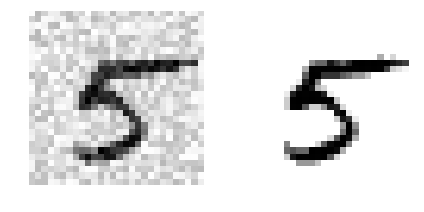

In [67]:
some_index = 5500
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
save_fig("noisy_digit_example_plot")
plt.show()

左边是噪声输入图像，右边是干净的目标图像。 现在让我们训练分类器，让它清理这个图像：

Saving figure cleaned_digit_example_plot


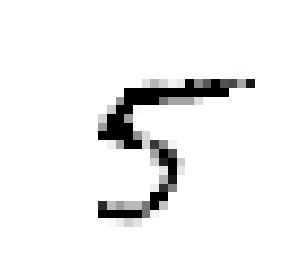

In [68]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)
save_fig("cleaned_digit_example_plot")

看起来足够接近目标！到此我们结束了我们的分类之旅。希望你现在应该知道
* 如何为分类任务选择好的指标
* 选择适当的精度/召回权衡，
* 选择适当的比较分类器，
* 以及更一般地为各种任务建立良好的分类系统。

## Extra material
### Dummy (ie. random) classifier

In [69]:
from sklearn.dummy import DummyClassifier

dmy_clf = DummyClassifier()
y_probas_dmy = cross_val_predict(dmy_clf, X_train, y_train_5, cv=3, method="predict_proba")
y_scores_dmy = y_probas_dmy[:, 1]

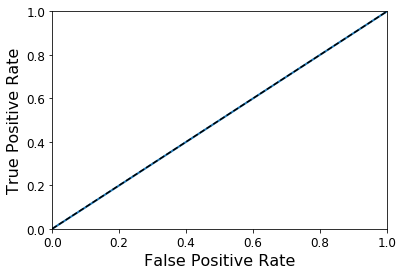

In [70]:
fprr, tprr, thresholdsr = roc_curve(y_train_5, y_scores_dmy)
plot_roc_curve(fprr, tprr)

### KNN classifier

In [71]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=4)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='distance')

In [72]:
y_knn_pred = knn_clf.predict(X_test)

In [73]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_knn_pred)

0.9714

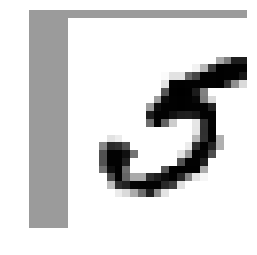

In [74]:
from scipy.ndimage.interpolation import shift
def shift_digit(digit_array, dx, dy, new=0):
    return shift(digit_array.reshape(28, 28), [dy, dx], cval=new).reshape(784)

plot_digit(shift_digit(some_digit, 5, 1, new=100))

In [75]:
X_train_expanded = [X_train]
y_train_expanded = [y_train]
for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    shifted_images = np.apply_along_axis(shift_digit, axis=1, arr=X_train, dx=dx, dy=dy)
    X_train_expanded.append(shifted_images)
    y_train_expanded.append(y_train)

X_train_expanded = np.concatenate(X_train_expanded)
y_train_expanded = np.concatenate(y_train_expanded)
X_train_expanded.shape, y_train_expanded.shape

((300000, 784), (300000,))

**注意**：下面的代码运行时间较长

In [76]:
knn_clf.fit(X_train_expanded, y_train_expanded)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='distance')

**注意**：下面的代码运行时间较长

In [78]:
y_knn_expanded_pred = knn_clf.predict(X_test)

In [79]:
accuracy_score(y_test, y_knn_expanded_pred)

0.9763

In [80]:
ambiguous_digit = X_test[2589]
knn_clf.predict_proba([ambiguous_digit])

array([[0.       , 0.       , 0.5053645, 0.       , 0.       , 0.       ,
        0.       , 0.4946355, 0.       , 0.       ]])

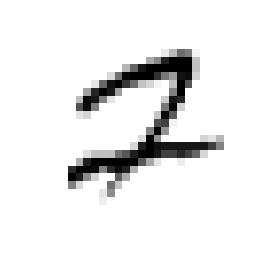

In [81]:
plot_digit(ambiguous_digit)

## Exercises

 ### 1. An MNIST Classifier With Over 97% Accuracy
Try to build a classifier for the MNIST dataset that achieves **over 97%** accuracy on the test set. **Hint**: the **KNeighborsClassifier** works quite well for this task; **you just need to find good hyperparameter values** (try a **grid search** on the **weights** and  **n_neighbors** hyperparameters).

In [71]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]

knn_clf = KNeighborsClassifier()
# 网格搜索
grid_search = GridSearchCV(knn_clf, param_grid, cv=3, verbose=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  18 | elapsed: 173.4min remaining: 138.7min
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed: 229.1min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'n_neighbors': [3, 4, 5], 'weights': ['uniform', 'distance']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [72]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [73]:
grid_search.best_score_

0.9718166666666667

In [74]:
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.9714

### 2. Data Augmentation

* Write a function that can shift an MNIST image in any direction (left, right, up, or down) by one pixel. 
* Then, for each image in the training set, create four shifted copies (one per direction) and add them to the training set. 
* Finally, train your best model on this expanded training set and measure its accuracy on the test set.

You should observe that your model performs even better now! This technique of artificially growing the training set is called **data augmentation** or **training set expansion**.

In [77]:
from scipy.ndimage.interpolation import shift

In [78]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

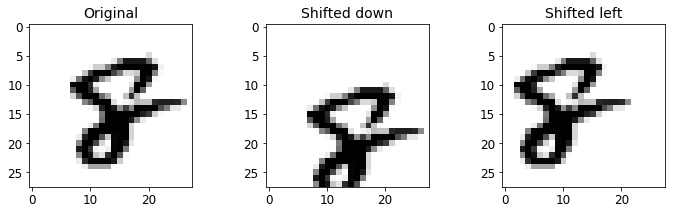

In [79]:
image = X_train[1000]
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

In [80]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [81]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [82]:
knn_clf = KNeighborsClassifier(**grid_search.best_params_)

In [83]:
knn_clf.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='distance')

In [84]:
y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9763

By simply augmenting the data, we got a 0.5% accuracy boost. :)